# Tarea 1: Generación  de Redes y sus Propiedades
## Cristian Candia-Castro Vallejos $^{1,2}$
[1] Centro de Investigación en Complejidad Social, Universidad del Desarrollo, Santiago, Chile.

[2] Collective Learning Group, MIT Media Lab, Cambridge, Massachusetts, USA
#### Noviembre 2018

## Indicaciones
La fecha de entrega de la tarea es el día lunes 10 de diciembre via emial crcandiav@gmail.com. Deben adjuntar el código (recomendado, pero no excluyente, usar IPython Notebook), y las respuestas de las siguientes secciones.

## Paquetes útiles

El paquete NetworkX provee [funciones para generar redes bajo diferentes modelos](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), tales como Erdos-Renyi, Watts-Strogratz y Barabasi-Albert.

In [139]:
import numpy as np
import pandas as pd
import collections 
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
%matplotlib inline

## Ejercicio 1

Genere una red Watts-Strogatz y calcule el coeficiente de clustering, la longitud del camino medio, ambos, en función de la probabilidad de recableado $p$. Use $N = 1000$ nodos y grado promedio de $<k>=10$. El resultado debería verse similar a la figura 2 del artiículo [Collective dynamics of
‘small-world’ networks](http://www.nature.com/nature/journal/v393/n6684/abs/393440a0.html)

In [105]:
#df = pd.DataFrame({"p": [.0001, .00025, .00075, .001, .0025, .0075, .01, .025, .075, .1, .25, .75, 1]})
df = pd.read_csv("sw.csv")

In [6]:
#np.logspace(-4, 0, 9)

In [107]:
df.head()

,p,C(p)/C(0),L(p)/L(0)
0,0.000100,0.999418,0.909852
1,0.000126,0.999202,0.818256
2,0.000158,0.999202,0.758408
3,0.000200,1.000000,0.771392
4,0.000251,0.999161,0.736004


In [134]:
df.rename(columns={'C(p)/C(0)': 'C', 'L(p)/L(0)' : 'L'}, inplace=True)

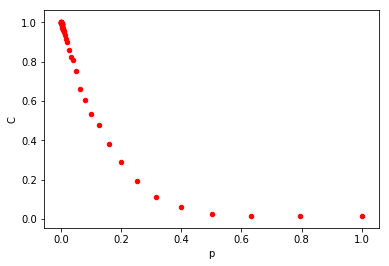

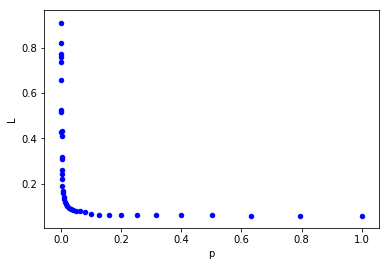

In [138]:
df.plot(kind='scatter',x='p',y='C',color='red')
df.plot(kind='scatter',x='p',y='L',color='blue')
plt.show()

In [128]:
G = nx.watts_strogatz_graph(1000, 10, 0.000100)

In [129]:
nx.average_shortest_path_length(G)

40.98144144144144

In [130]:
G = nx.watts_strogatz_graph(1000, 10, 0.000126)

In [131]:
nx.average_shortest_path_length(G)

50.450450450450454

In [133]:
40.98144144144144/50.450450450450454

0.8123107142857142

In [109]:
#dict(G.degree())# Diccionario con el grado de cada nodo de la red G1

In [110]:
#dict(nx.all_pairs_shortest_path_length(G)) #Diccionario con los caminos mas cortos entre todos los nodos de la red G1

In [111]:
#dict(nx.clustering(G)) #Dicc

In [8]:
def GetClustering(probabilidad):    
    cluster = []
    
    for p in probabilidad:
        G = nx.watts_strogatz_graph(1000, 10, p)
        cluster.append(nx.average_clustering(G))
    
    return pd.DataFrame(cluster)

In [9]:
df["C"] = GetClustering(df.p)

In [10]:
def GetShortPath(probabilidad):    
    s_path = []
    
    for p in probabilidad:
        G = nx.watts_strogatz_graph(1000, 10, p)
        s_path.append(nx.average_shortest_path_length(G))
    
    return pd.DataFrame(s_path)

In [11]:
df["L"] = GetShortPath(df.p)

In [12]:
df["CF"] = df.C / df.C[0]

In [13]:
df["LF"] = df.L / df.L[0]

In [14]:
df

,p,C,L,CF,LF
0,0.000100,0.666134,50.450450,1.000000,1.000000
1,0.000316,0.666423,26.381357,1.000434,0.522916
2,0.001000,0.665286,30.834294,0.998727,0.611180
3,0.003162,0.659973,14.913932,0.990751,0.295615
4,0.010000,0.645186,8.858865,0.968552,0.175595
5,0.031623,0.609262,5.918733,0.914623,0.117318
6,0.100000,0.486643,4.358418,0.730548,0.086390
7,0.316228,0.221640,3.575157,0.332725,0.070865
8,1.000000,0.008161,3.268438,0.012252,0.064785


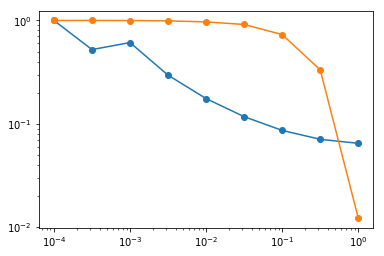

In [16]:
plt.loglog(df.p, df.LF, marker='o')
plt.loglog(df.p, df.CF, marker='o')

plt.show()

### ¿Qué puedes concluir de esta gráfica? 
(Tip: recuerda que sucede al aumentar la aleatoriedad de una red para el coeficiente de clustering y la longitud de camino)
#### Escribe tu respuesta acá


## Ejercicio 2

Plotea la función de distribución de grados $k$, la distribución de caminos mas cortos $L$ (recuerda que este algoritmo es lento) y el coeficiente de clustering v/s el grado de nodo $c(k)$ para las siguientes redes aleatorias (Watts-Strogatz):

1) $N=100$ nodos, p=0.6 y $<k>$=80


In [99]:
G = nx.watts_strogatz_graph(100, 80, 0.6)

### 2.1  Distribucion de grado ( k )

In [100]:
N = len(G)
L = G.size()
degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

#### Escala lineal:

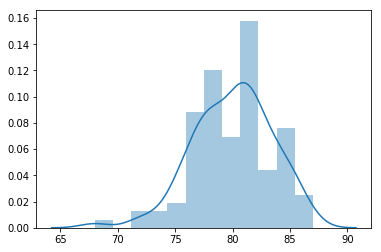

In [154]:
sns.distplot(degrees)

#### Escala logaritmica

In [155]:
de_lognorm = lognorm.rvs(0.2, size=10000)

sns.distplot(degrees, fit=lognorm)

NameError: name 'lognorm' is not defined

In [92]:
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histograma de la data para esos bines
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

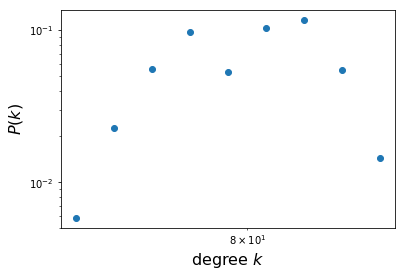

In [93]:
fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# Muestra la gráfica
plt.show()

### 2.2  Distribucion de camino mas corto ( L )

In [150]:
clu = list(dict(nx.clustering(G)))

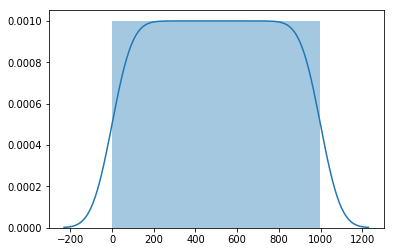

In [152]:
sns.distplot(clu)

In [ ]:
.

2) $N=1000$ nodos, p=0.6 y $<k>$=80

3) $N=10000$ nodos, p=0.6 y $<k>$=80

4) $N=100000$ nodos, p=0.6 y $<k>$=80

### Tips para el ejercicio 2

In [ ]:
#Si G1 es un elemento Networkx graph:

dict(G1.degree())# Diccionario con el grado de cada nodo de la red G1
dict(nx.all_pairs_shortest_path_length(G1)) #Diccionario con los caminos mas cortos entre todos los nodos de la red G1
dict(nx.clustering(G1)) #Diccionario con el coeficiente de clustering para cada nodo de la red G1

### Escribe tu código acá
##### (Puedes agragar mas celdas)

### ¿Qué puedes concluir sobre la distribución de grados para distintos tamaños de $N$? 
(Tip: recuerda lo que ocurre para redes con pocos nodos)

Escribe tu respuesta acá


### ¿Cuál es el grado máximo y mínimo en cada red aleatoria? 

Escribe tu respuesta acá


### Comente  acerca de las consecuencias de la distribución de nodos con respecto a los hubs.

Escribe tu respuesta acá

### ¿Qué puedes concluir sobre la distribución de distancias para distintos tamaños de $N$? 

Escribe tu respuesta acá

### ¿Cuál es la distancia promedio para cada red?  Comente sobre la propiedad small world

Tip: Grafique $<d>$ v/s N

Escribe tu respuesta acá

### Calcule el coeficiente de clustering promedio para cada una de las redes aleatorias. Comente como cambia el coeficiente de clustering con el grado del nodo.

Escribe tu respuesta acá

### Grafique cómo varía el coeficiente de clustering con el tamaño de la red (C v/s N). Comente.

Escribe tu respuesta acá

## Ejercicio 3

Grafique la distribución de grados para una red Barabasi-Albert y ajuste la ley de potencia [(como se explicó en clases)](https://pypi.org/project/powerlaw/) . Use el paquete:

In [ ]:
#pip install powerlaw

### Tips para el ejercicio 3

(Tiene que ser una ley de potencia)

La red de [Barabasi-Albert (Science Magazine)](http://science.sciencemag.org/content/286/5439/509) tiene dos parametros: $m_0$ (nuúmero de nodos incial), y $m$ (número de enlaces de un nuevo nodo a conectar a uno existente).

Puedes crear un objeto networkx Graph que contiene la red [Barabasi-Albert (Wikipedia)](https://es.wikipedia.org/wiki/Modelo_Barab%C3%A1si%E2%80%93Albert) con $m_0=10000$ nodos iniciales y una cantidad de $m=5$ nuevos enlaces usando:

In [ ]:
ba = nx.barabasi_albert_graph(10000, 5, seed = None) 

### Escribe tu código acá

In [34]:
ba = nx.barabasi_albert_graph(10000, 5, seed = None) 

#### Distribucion de grados

In [35]:
N = len(ba)
L = ba.size()
degrees = list(dict(ba.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

In [36]:
# Entrega 20 bins linealmente espaceados entre kmin y kmax
bin_edges = np.linspace(kmin, kmax, num=50)

# histograma de la data en estos bines 
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

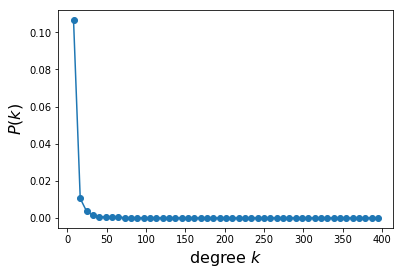

In [60]:
fig = plt.figure(figsize=(6,4))

# "x" debería ser el punto meido (en escala lineal) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='-')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


# Muestra la gráfica
plt.show()

#### Grafica con powerlaw

In [47]:
import powerlaw

/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


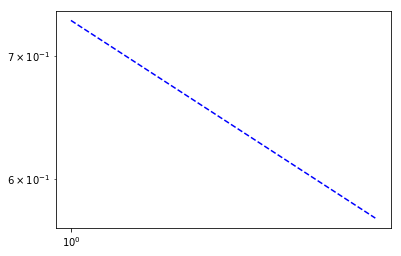

In [68]:
fit = powerlaw.Fit(np.array(density) + 1, xmin=1, discrete=True)
fit.power_law.plot_pdf(color='b', linestyle='--', label='fit ccdf')
fit.plot_pdf(color= 'b')

### Comenta sobre las diferencias entre las redes aleatorias y las redes libre de escala (por ejemplo, Barabasi-Albert).
Recuerda lo visto en clases (hubs, coeficiente de clustering, longitud de caminos, distribución de grados, etc.)

### Escribe tu respuesta acá